# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [72]:
# 1. Preparación de Datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np


In [49]:
ruta="/content/Ventas (1).csv"
df=pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB
None


In [51]:
# transformar la fecha de objetc a datatime
df['Fecha']=pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [52]:
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [53]:
# normalizamos los datos
escala=MinMaxScaler(feature_range=(0,1))# normalizar dentro de el rango de 0 a 1
normado=escala.fit_transform(df[["DíaDeLaSemana","Promociones","Festivo","Ventas"]])
df_normalizado=pd.DataFrame(normado,columns=["DíaDeLaSemana","Promociones","Festivo","Ventas"])
df_normalizado


,DíaDeLaSemana,Promociones,Festivo,Ventas
0,0.833333,0.0,0.0,0.880284
1,1.000000,0.0,1.0,0.873508
2,0.000000,0.0,0.0,0.097773
3,0.166667,1.0,0.0,0.239109
4,0.333333,0.0,0.0,0.380445
...,...,...,...,...
360,0.166667,1.0,0.0,0.285253
361,0.333333,0.0,0.0,0.401097
362,0.500000,0.0,0.0,0.552759
363,0.666667,0.0,0.0,0.737657


In [54]:
#Variable independiente
X=df_normalizado.drop(columns=["Ventas"],axis=1)

In [55]:
#Variable dependiente
y=df["Ventas"]

In [56]:
X_entrenamiento,X_prueba,y_entrenamiento,y_prueba=train_test_split(X,y,train_size=0.8,random_state=42)

In [57]:
model_lineal=LinearRegression()
model_lineal.fit(X_entrenamiento,y_entrenamiento)


LinearRegression()

In [13]:
model_lineal.score(X_prueba,y_prueba)

0.9924245101323563

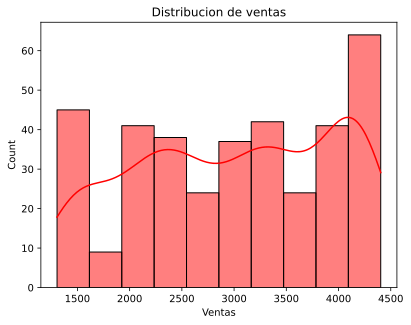

In [58]:
#2. Análisis Exploratorio de Datos (EDA)
sns.histplot(df["Ventas"],kde=True,color="red")
plt.title("Distribucion de ventas")
plt.show()

In [59]:
predicha=model_lineal.predict(X_prueba)
real=y_prueba

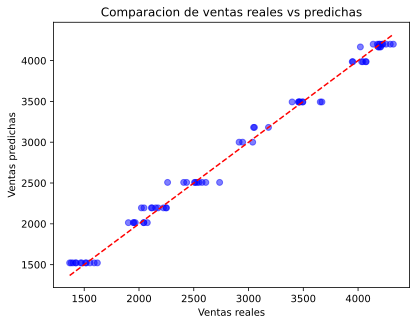

In [60]:
# hacer grafica de predichas vs real
plt.scatter(real,predicha,color="blue",alpha=0.5)
min_val = min(real.min(), predicha.min())
max_val = max(real.max(), predicha.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal (y=x)")
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Comparacion de ventas reales vs predichas")
plt.show()

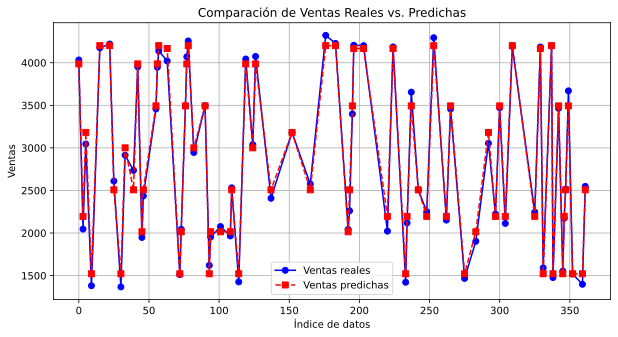

In [61]:
df_test = pd.DataFrame({"Ventas reales": real, "Ventas predichas": predicha})
df_test.sort_index(inplace=True)  # Ordenar por índice

plt.figure(figsize=(10,5))
plt.plot(df_test["Ventas reales"], label="Ventas reales", linestyle="-", marker="o", color="blue")
plt.plot(df_test["Ventas predichas"], label="Ventas predichas", linestyle="--", marker="s", color="red")

plt.xlabel("Índice de datos")
plt.ylabel("Ventas")
plt.title("Comparación de Ventas Reales vs. Predichas")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Esto se debio analizar al principio , pero igual nos sercioraremos que el algoritmo de aprendizaje supervisado sea el correcto
modelos=[("Regresion Lineal",LinearRegression()),("Arboles de decision",DecisionTreeRegressor(random_state=42)),("Bosques aleatorios",RandomForestRegressor(random_state=42))] # Instantiate the models
for nombre , modelo in modelos:
  modelo.fit(X_entrenamiento,y_entrenamiento)
  score=modelo.score(X_prueba,y_prueba)
  print(f"{nombre} : {score}")

Regresion Lineal : 0.9924245101323563
Arboles de decision : 0.9923508015371342
Bosques aleatorios : 0.9923097376813321


El que nos da un mejor puntaje es la regresion lineal . Por lo tanto, en la prediccion se usara la regresion lineal

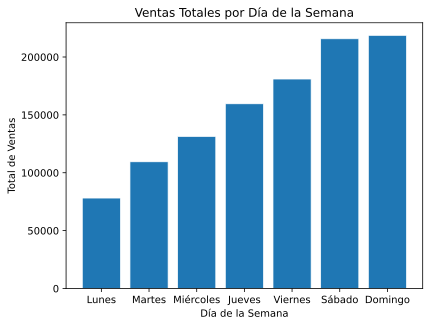

In [69]:
ventas_por_dia = df.groupby("DíaDeLaSemana")["Ventas"].sum()

# Crear la gráfica
fig, ax = plt.subplots()
ax.bar(ventas_por_dia.index, ventas_por_dia.values, width=0.8, edgecolor="white", linewidth=0.7)

# Etiquetas y título
ax.set_xticks(ventas_por_dia.index)  # Asegurar que los días sean enteros
ax.set_xticklabels(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
ax.set_xlabel("Día de la Semana")
ax.set_ylabel("Total de Ventas")
ax.set_title("Ventas Totales por Día de la Semana")

plt.show()

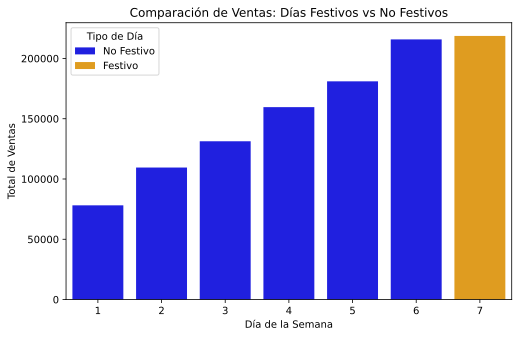

In [81]:

# Agrupar y sumar ventas por día de la semana para días festivos y no festivos
ventas_por_dia_festivo = df[df["Festivo"] == 1].groupby("DíaDeLaSemana")["Ventas"].sum().reset_index()
ventas_por_dia_no_festivo = df[df["Festivo"] == 0].groupby("DíaDeLaSemana")["Ventas"].sum().reset_index()

# Fusionamos los datos en un solo DataFrame para facilitar la comparación
ventas_por_dia_festivo["Tipo"] = "Festivo"
ventas_por_dia_no_festivo["Tipo"] = "No Festivo"
df_ventas = pd.concat([ventas_por_dia_festivo, ventas_por_dia_no_festivo])

# Graficar con seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="DíaDeLaSemana", y="Ventas", hue="Tipo", data=df_ventas, palette=["blue", "orange"])

# Configurar etiquetas
plt.title("Comparación de Ventas: Días Festivos vs No Festivos")
plt.xlabel("Día de la Semana")
plt.ylabel("Total de Ventas")
plt.legend(title="Tipo de Día")

# Mostrar la gráfica
plt.show()
